In [42]:
import emoji
import numpy as np
import matplotlib.pyplot as plt
import control as co
from scipy import signal
from IPython.display import Image
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

![logo](img/upp2.png)

# Universidad Politécnica de Puebla (JJVS 2021)
## Control automático
### 1. Respuesta en el tiempo

La respuesta en el tiempo de un sistema se compone de dos partes:

- Transitoria: Parte de la respuesta total que tiende a cero a medida que el tiempo tiende a infinito. En forma matemática:


$$\displaystyle\lim_{t \to \infty}{y(t)} = 0$$


- Estacionaria o permanente: Parte de la respuesta total que no tiende a cero a medida que el tiempo tiende a infinito. Es decir: 



$$\displaystyle\lim_{t \to \infty}{y(t)} = C$$

 

Así que se tiene:
<center>Respuesta total (t) = Respuesta transitoria (t) + Respuesta permanente (t) </center>

#### 1.1 Señales típicas de entrada
Para obtener la respuesta de un sistema generalmente se emplea alguna de las señales mostradas en la figura.

<img src="img/resp_t/senales2.png" width="600px">


#### 1.2 Sistemas de primer orden
Considere un sistema de primer orden, cuya función de transferencia es 
\begin{equation}
G(s)=\frac{Y(s)}{R(s)}=\frac{K}{Ts+1}
\label{ec_po}
\end{equation}


En wxmaxima (http://andrejv.github.io/wxmaxima/), el comando a emplear para obtener la transformada inversa de Laplace, a una entrada escalón unitario, es: 

 <center>ilt(k/(%tau*s^2+s), s, t); </center>

Para obtener la respuesta a una entrada esclón, se emplea el siguiente código:



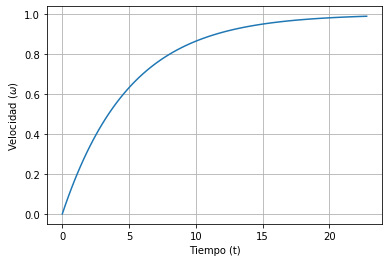

In [43]:
K=1
T=5
systf = co.tf([K], [T, 1]) # Creamos el sistema mediante la función de transferencia.
t,y=co.step_response(systf)
plt.plot(t,y)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

#### 1.3 Sistemas de segundo orden

En la figura se muestra el diagrama a bloques de un sistema prototipo de segundo orden.

<img src="img/resp_t/bloque_seg.png" width="600px">

La función de transferencia del sistema retroalimentado para este sistema prototipo es:  

\begin{equation}
\frac{Y(s)}{R(s)}=\frac{\omega_n^2}{s^2+2\zeta\omega_ns+\omega_n^2}
\label{eq2ord}
\end{equation}

donde $\omega_n$ es  conocida como la frecuencia natural del sistema y $\zeta$ es el coeficiente de amortiguamiento.




La dinámica del sistema depende de la ubicación de los polos de la función de transferencia, los cuales están dados por

\begin{equation}
s_{12}=-\zeta\omega_n \pm j\omega_n \sqrt{\zeta^2-1}
\end{equation}

Dependiendo del valor de $\zeta$ podemos tener los siguientes 3 casos:

- $0<\zeta<1$. Polos complejos conjugados en la parte izquierda del plano complejo. En este caso se dice que el sistema es subamortiguado.
- $\zeta=1$. Polo real repetido. Se dice que el sistema tiene amortiguamiento crítico. 
- $\zeta>1$. Polos reales distintos. El sistema se dice sobreamortiguado.
	
El siguiente código se utiliza para obtener la respuesta en el tiempo de un sistema retroalimentado de segundo orden con diferentes parámetros.



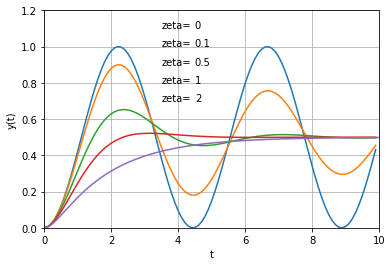

In [44]:
wn=1
zeta=[0,0.1,0.5,1,2]
for i in range(0, 5):
 systf=co.tf([wn*wn], [1, 2*zeta[i]*wn, wn*wn])
 sysrg=co.feedback(systf,1)
 tr,yr=co.step_response(sysrg,10)
 plt.text(3.5,1.1-0.1*i,"zeta=")
 plt.text(4.5,1.1-0.1*i,zeta[i])
 plt.plot(tr,yr)
  
plt.grid()
plt.ylabel('y(t)')
plt.xlabel('t')
plt.ylim(0,1.20)
plt.xlim(0,10)
plt.show()

#### 1.4 Especificaciones en el dominio del tiempo

La respuesta de un sistema de segundo orden se caracteriza principalmente por los siguientes parámetros: Tiempo de retardo ($t_d$), tiempo de subida ($t_r$), tiempo pico ($t_p$), tiempo de establecimiento ($t_s$) y porcentaje de sobretiro (POS) = ($Y_{max}$-1)x100\%=$M_{p}$x100\%, como puede verse en la figura.
<img src="img/resp_t/espec_t.jpg" width="600px">

##### 1.4.1 Fórmulas para las especificaciones en el tiempo
Existen algunas fórmulas que se calculan mediante aproximaciones para los parámetros antes mostrados. A continuación se muestran:

\begin{eqnarray}
t_p&=&\frac{\pi}{\omega_n \sqrt{1-\zeta^2}} \\
t_d&\approx &\frac{1+0.7\zeta}{\omega_n}, ~ 0<\zeta<1 \\
t_r&\approx &(0.8+2.5\zeta) / {\omega_n}\\
t_s&\approx &{3.2}/{\zeta\omega_n}, ~ 0<\zeta<0.69 \\
t_s&\approx &{4.5\zeta}/{\omega_n}, ~ \zeta>0.69 \\
y_{max}&=&e^{-{\frac{\pi\zeta}{\sqrt(1-\zeta^2)}}}
\end{eqnarray}		


### 1.5 Error en estado estable

El error en estado estable es generado principalmente por  la fricción, imperfecciones y a la composición natural del sistema. Otras causas que ocasionan este error son:

* Características no lineales
* Zona muerta
* Las señales cuantizadas de circuitos digitales
* Fricción de Coulomb

<img src="img/resp_t/nolineal.png" alt="Girl in a jacket"  width="300px">
<img src="img/resp_t/cuant.png" alt="Girl in a jacket"  width="300px">



Para un sistema con retroalimentación unitaria, como el mostrado en la figura, el error se determina por:

<img src="img/resp_t/retro_uni.png" alt="Girl in a jacket"  width="300px">

\begin{equation}
e(t)=r(t)-y(t)
\end{equation}

y el error en estado estable se calcula en el dominio del tiempo y en términos de Laplace como:

\begin{equation}
e_{ss}=\displaystyle\lim_{t \to \infty}{e(t)}=\displaystyle\lim_{s \to 0}{sE(s)}
\end{equation}


Para el sistema mostrado en la figura, $E(s)=\frac{R(s)}{1+G(s)}$
, por lo tanto 

\begin{equation}
e_{ss} = \displaystyle\lim_{t \to \infty}{e(t)}=\displaystyle\lim_{s \to 0}sE(s)=\displaystyle\lim_{s \to 0}{\frac{sR(s)}{1+G(s)}}
\end{equation}

Para una entrada escalón $R(s)=K_e/s$

\begin{equation}
e_{ss} = \displaystyle\lim_{s \to 0}\frac{s(K_e/s)}{1+G(s)}=\frac{K_e}{1+\displaystyle\lim_{s \to 0}G(s)}=\frac{K_e}{1+K_p}
\end{equation}

Para una entrada rampa $R(s)=K_r/s^2$

\begin{equation}
e_{ss} = \frac{K_r}{\displaystyle\lim_{s \to 0}sG(s)}=K_r/K_v
\end{equation}

Para una entrada parabólica $R(s)=K_p/s^2$

\begin{equation}
e_{ss} = \frac{K_p}{\displaystyle\lim_{s \to 0}s^2G(s)}=K_p/K_a
\end{equation}


#### 1.6 Estabilidad

Un sistema dinámico lineal e invariante en el tiempo se dice estable si cualquier entrada acotada

\begin{equation}
\mid u(t) \mid<M_1 , t\geqslant t_0
\end{equation}

produce una salida acotada

\begin{equation}
\mid y(t)\mid < M_2, t\geqslant t_0
\end{equation}
donde $M_1$ y $M_2$ son números positivos finitos.


**Un sistema $H$ con dominio y contradominio $D$ es llamado estable de entrada-salida si siempre que la entrada pertenezca al dominio la salida está dentro de $D$. En otras palabra, H es estable en $X$ si la salida está en $X$ siempre que la entrada $u \in X$.**  

**Tipos de estabilidad**
* **Absoluta**: Se refiere a la condición de si el sistema es estable o inestable.
* **Relativa**: Después de determinar que tan estable es el sistema, es necesario indicar qué tan estable es.



**Métodos para determinar la estabilidad**
Existen tres métodos principalmente utilizados para determinar la estabilidad. La estabilidad absoluta se obtiene mediante el método de Routh-Hurwitz y la estabilidad relativa mediante Nyquist o Bode.

* Routh-Hurtwitz
* Nyquist
* Bode




#### 2.7 Método de Routh-Hurwitz
Considere una función de transferencia expresada de la siguiente forma:

\begin{equation}
\frac{Y(s)}{R(s)}=\frac{n(s)}{d(s)}
\end{equation}

Si el polinomio del denominador se expresa de la forma:

\begin{equation}
d(s)=a_ns^n+a_{n-1}s^{n-1}+...+a_1s+a_0
\end{equation}

Sí todos los polos de $d(s)$ están ubicados en el semiplano izquierdo, se dice que es un polinomio Hurwitz. Y esto se cumple, algunas veces, sí:


* Todos los coeficientes en la ecuación tienen el mismo signo.
* Ninguno de los coeficientes es igual a cero.


Para un sistema de sexto orden con denominador expresado como: 

\begin{equation}
a_6s^6+a_5s^5+a_4s^4+a_3s^3+a_2s^2+a_1s+a_0. 
\end{equation}

La tabulación del método se realiza de la manera indicada en la tabla. El término inferior se calcula al mutiplicar el elemento pivote con el elemento de la columna derecha y dividiendo este producto entre el pivote.

$
\begin{array}{ccccc}
s^6  &  a_6  &  a_4  &  a_2  &  a_0  \\ 
s^5  &  a_5  &  a_3  &  a_1  &  0  \\ 
s^4  &  \frac{a_5a_4-a_6a_3}{a_5}=A   &  \frac{a_5a_2-a_6a_1}{a_5}=B   &  \frac{a_5a_0-a_6(0)}{a_5}=a_0  &  0  \\ 
s^3  &  \frac{Aa_3-a_5B}{A}=C   &  \frac{Aa_1-a_5a_0}{A}=D  &  \frac{A(0)-a_5(0)}{A}=0  &  0  \\ 
s^2  &  \frac{CB-AD}{C}=E  &  \frac{Ca_0-A(0)}{C}=a_0  &  \frac{C(0)-A(0)}{C}=0  &  0  \\ 
s^1  &  \frac{ED-Ca_0}{E}=F  		&  0  &  0  &  0  \\ 
s^0  &  \frac{Fa_0-E(0)}{F}=a_0  	&  0  &  0  &  0 \\
\end{array} $\\

Las raíces están ubicadas en el semiplano izquierdo si los coeficientes de la primera columna son del mismo signo. El número de cambios de signo es igual al número de raíces con partes reales positivas.

##### 1.7.1 Routh-Hurwitz, casos especiales
1. El primer elemento en cualquiera de los renglones de la tabulación de Routh es cero, pero los otros no lo son. En este caso se remplaza el elemento cero en la primera columna por un número pequeño positivo y arbitrario $\varepsilon$ y después se continua con la tabulación de Routh. 
2. Los elementos en un renglón de la tabulación de Routh son todos cero.
    * Forme la ecuación auxiliar $A(s)=0$ mediante el uso de los coeficientes del renglón que se  encuentra justo antes del renglón de ceros.
    * Tome la derivada de la ecuación auxiliar con respecto a $s$; esto da $dA(s)/ds=0$.
    * Remplace el renglón de ceros con los coeficientes de $dA(s)/ds=0$.


Mediante Scilab es posible obtener la tabulación de Routh-Hurwitz, el código para lograrlo es:

**routh_t(s^4+6*s^3+5*s^2+2*s+1)**


Y el resultado obtenido es el siguiente:

 | |   |     |    |
|---:|:---|:---|:---|
| 1 | 5 | 1 |
| 6 | 2 | 0 | 
|4.6| 1 | 0 | 
|0.7| 0 | 0 | 
| 1 | 0 | 0 | 
 
Ya que no existe cambio de signo en la primera columna todas las raíces del polinomio se encuentran en el semiplano izquierdo del plano s.

#### 1.8 Lugar geométrico de las raíces (root locus)

Un sistema general retroalimentado se representa por el siguiente diagrama a bloques.

<img src="img/resp_t/bloque_retro.png" width="300px">

Y se puede demostrar que la función de transferencia para este sistema es:

\begin{equation}
\frac{Y(s)}{R(s)}=\frac{G(s)}{1+KG(s)H(s)}
\end{equation}

Si se considera a $K$ como un parámetro variable la ecuación característica puede expresarse como:

\begin{equation}
1+KG(s)H(s)=0
\end{equation}  

La ecuación característica se obtiene al igualar el denominador a cero. Las raíces de la ecuación característica son los polos del sistema, y para que sea estable es necesario que estén ubicados en el semiplano izquierdo.

**Ejemplo**: Considere un sistema con ecuación característica 

\begin{equation}
1+KG(s)H(s)=1+\frac{2Ks}{s(s+1)(s+2)+s^2+3s+5}=0
\end{equation}

Que desarrollando el polinomio puede expresarse como:

\begin{equation}
s^3+4s^2+5s+5+2Ks=s^3+4s^2+(5+2K)s+5=0   
\end{equation}

donde puede notarse que la ubicación de los tres polos dependen del valor de K. Una elección de K adecuada permitirá que los polos se ubiquen en el semiplano izquierdo.




**Ejemplo K variable**

Considere el sistema con ecuación característica
\begin{equation}
s^2+(3+k)s+10=0
\label{ej1rl}
\end{equation}

El lugar geométrico de las raíces de esta ecuación, se muestra en la siguiente figura, donde es posible notar que el lugar geométrico inicia en los polos de la ecuación característica con $k=0$, así la ecuación será $s²+3s+10=0$ cuyas raíces son $- 1.5 \pm j 2.78385 $. Para una $k=1000$ se obtienen raíces en -0.00997 y -1002.99. La ecuación anterior puede expresarse como:

\begin{equation}
1+k\frac{s}{s^2+3s+10}=0
\label{ej1rv2l}
\end{equation}

donde es posible notar esta ecuación muestra un cero en el origen y el otro que no se muestra en infinito, y polos en  $- 1.5 \pm j 2.78385 $.
 
<img src="img/resp_t/rlocuse1.png" width="300px"> 
 


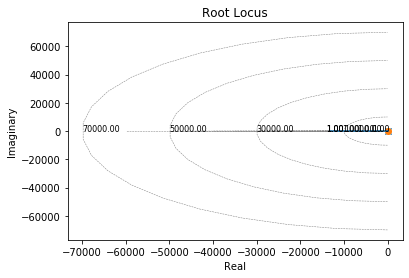

array([[-1.49995  -2.78390912j, -1.49995  +2.78390912j],
       [-1.4999501-2.78390907j, -1.4999501+2.78390907j],
       [-1.4999502-2.78390901j, -1.4999502+2.78390901j],
       ...,
       [-1.5000498-2.78385535j, -1.5000498+2.78385535j],
       [-1.5000499-2.78385529j, -1.5000499+2.78385529j],
       [-1.50005  -2.78385524j, -1.50005  +2.78385524j]])

In [45]:
sys=co.TransferFunction((1, 0), (1, 3, 10))
rlist, klist = co.rlocus(sys,kvect=np.linspace(-.1e-3, 1e-4, num=1000))
plt.show()
rlist

El lugar de las raíces muestra la ubicación de los polos al variar el parámetro $K$. Donde los valores de $K$ van de de $0$ a $\infty$.

\begin{equation}
1+KG(s)H(s)=0
\end{equation}

La ubicación de los polos deben cumplir con dos condiciones: **magnitud y ángulo**.

1. $G(s)H(s)=-\frac{1}{K}$
2. $\measuredangle G(s)H(s)=(2i+1)\pi=$múltiplos impares de 180$^o$.


#####  Propiedades del lugar geométrico de las raíces (LGR)

	1. El número de ramas del LGR es igual al orden del polinomio. 
	2. El LGR es simétrico respecto al eje real del plano s.
	3. El LGR principia en los polos y termina en los ceros.

<img src="img/evans1.png" width="500px">

##### Lugar geométrico de las raíces con Scilab/Matlab

Para obtener la gráfica de la ubicación de los polos para diferentes valores de K en Scilab o Matlab, es necesario expresar la ecuación característica de la siguiente forma:

\begin{equation}
\label{formrl}
1+KG(s)H(s)=1+K\frac{num}{den}=0
\end{equation}

Es decir, es necesario factorizar K y expresar la ecuación característica en la forma mostrada en la ecuación. Los datos que se proporcionan a la computadora son el numerador y denominador.

**Ejemplo**: Considere el sistema con ecuación característica:

\begin{equation}
s^4+25s^3+15s^2+20s+K=0
\end{equation}
Dividiendo entre K los términos independientes de K, se obtiene:
\begin{equation}
1+\frac{K}{s^4+25s^3+15s^2+20s}=1+K\frac{1}{s^4+25s^3+15s^2+20s}=0
\end{equation}

A continuación se muestra el código en Scilab  para obtener el lugar de las raíces (ubicación de los polos variando la ganancia K). 

\begin{columns}
s=%s;
num=1;
den=s^4+25*s^3+15*s^2+20*s;
sys=syslin('c',num/den);
clf();
evans(sys,100);sgrid()
[Ki,s]=kpure(sys) 
plot([real(s) real(s)],[imag(s) -imag(s)],'*r')
cad=msprintf('%3.2f',Ki)
hl=legend(cad);
\end{columns}


El comando *evans* se emplea para obtener el LGR. La instrucción *kpure(sys)* se emplea para obtener el valor de K que permite obtener polos complejos conjugados. En Matlab se emplea el comando rlocus.

##### Lugar de las raíces : Parámetros variables

Para ecuaciones características de la forma:

\begin{equation}
1 +K_1 Q_1(s) +K_2 Q_2(s)=0
\end{equation}

Se emplea el siguiente proceso:

1. Se elimina una de las constantes, p.ej. $K_2$ se hace cero.
2. Se obtiene el lugar geométrico de las raíces para $K_1$ variable.
3. Se selecciona el valor de  $K_1$ que presente una respuesta con amortiguamiento crítico ($\zeta=1$) o sobreamortiguado ($\zeta>1$)  .
4. Con $K_1$ obtenido en el punto 3, ahora se repiten los pasos del 2 al 3 con $K_2$ variable.


##### Efectos de la adición de polos y ceros
###### Efectos de la adición de polos y ceros en el LGR

Para mostrar el efecto de agregar polos y ceros considera el sistema con ecuación característica:

\begin{eqnarray}
1+k\frac{1}{s(s+1)}=0
\label{ecc1}
\end{eqnarray}

<img src="img/resp_t/evan2.png" width="500px">


##### Efecto de la adición de un polo en el LGR
Si se agrega un polo en $s=-10$, a la ecuación característica. Se puede observar en la figura  el efecto en el lugar geométrico de las raíces. Como puede notarse el lugar de las raíces es movido hacía el semiplano derecho del plano s, esto indica que el sistema ahora puede tener valores de K que lo vuelvan inestable.

<img src="img/evan3.png" width="500px">

##### Efecto de la adición de un polo en el dominio del tiempo

El resultado puede observarse en la figura que muestra la respuesta en el dominio del tiempo para un sistema prototipo de segundo orden para diferentes valores de polos agregados.

<img src="img/resp_t/polotv3.png" width="500px">

Puede notarse en la figura que a medida que se incrementa el valor del polo agregado, la respuesta del sistema prototipo de segundo orden empieza a crecer y a presentar una señal con mayor sobretiro, si se sigue incrementado el valor del polo el sistema se puede volver inestable.

En otras palabras, el agregar un polo al sistema prototipo de segundo orden en la trayectoria directa provocará que el sistema se vuelva inestable.

\begin{multicols}
s=%s;
num=1;
zeta=1;
wn=1;
t=0:0.001:20;
p2=[1 s+1 2*s+1 5*s+1];
for i=1:4
den(i)=(s^2+2*zeta*wn*s)*p2(i);  
sysf=syslin('c',num/(num+den(i)));
y(i,:)=csim('step',t,sysf);
end
plot2d(t',y',style=[1 3 4 5]) ;
xtitle('Efectos de la adición 
de un polo en la función de 
trayectoria directa','tiempo',
'y(t)')
legends(['sin polo','s+1','s+2',
's+5'],[1,3,4,5]);
\end{verbatim}
\vfill
\columnbreak
Programa para Matlab
\begin{verbatim}
clear
zeta=1;
wn=1;
Tp=[0,1,2,5];
t=0:1e-3:20;
numo=wn^2;
deno=[1 2*zeta*wn 0];
for i=1:1:4
numm=numo;
denm=conv(deno,[Tp(i) 1]);
sys=tf(numm,denm);
sysr=feedback(sys,1);
step(sysr,t);
hold on
end  
grid
title('Efectos de la adición 
de un polo en la función de 
trayectoria directa')
\end{multicols}

##### Efecto de la adición de un cero en el LGR
Si ahora se agrega un cero al sistema en $s=-10$, se puede notar, en la figura, que el lugar de las raíces ahora se mueve hacia el semiplano izquierdo del plano $s$, ocasionando que el sistema sea más estable. 
<img src="img/resp_t/evan2.png" width="800px">
<img src="img/resp_t/evan4.png" width="800px">


#### Efecto de la adición de un cero en el dominio del tiempo
En la figura se muestra un sistema de segundo orden sin amortiguamiento y puede observarse que al incrementar el valor del cero el sistema es más estable.

<img src="img/resp_t/cerot2.png" width="500px">


Programa en Scilab

\begin{multicols}{2}
\begin{verbatim}
clear
s=%s;
num=1;
zeta=0.0;
wn=1;
t=0:0.001:15;
cero=[1 s+20 0.2*s+1 0.5*s+1 s+1 
20*s+1];
for i=1:6
num= cero(i);
den=(s^2+2*zeta*wn*s);  
sysf=syslin('c',num/(num+den));
y(i,:)=csim('step',t,sysf);
//pause
end
plot2d(t',y',style=[1 2 3 4 5 6]) ;
xtitle('','tiempo (s)','y(t)')
legends(['sin cero','s+20','0.2*s+1',
' 0.5*s+1', 's+1', '20s+1'],[1,2,3,4,
5,6]);
\end{verbatim}
\end{multicols}

##### Polos dominantes
Los polos cercanos al eje imaginario generan una respuesta transitoria que decae lentamente  y los lejanos al eje generan una respuesta que decae rápidamente. Si la magnitud de la parte real de un polo es de por lo menos 5 veces la de los polos complejos dominantes, se consideran insignificantes.

<img src="img/resp_t/polosdom.png" width="300px">


##### Cancelación de polos insignificantes
A continuacion se muestra mediante un ejemplo como realizar la cancelación de polos insignificantes. Considere la siguiente función de transferencia del sistema retroalimentado:

\begin{equation}
M(s)=\frac{Y(s)}{R(s)}=\frac{20}{(s+10)(s^2+2s+2)}
\end{equation}

Factorizando la ganancia del polo insignificante, se tiene:

\begin{equation}
\frac{20}{10(s/10+1)(s^2+2s+2)}\simeq\frac{2}{s^2+2s+2}
\end{equation}

De esta manera es posible reducir la ecuación con polos insignificantes.

#### Ejercicios

**Ejercicio 1:**
	Determine si los siguientes polinomios son Hurwitz.
	\begin{eqnarray}
	0.75s^2+2.5s+0.75=0\\
	s^3-1.25s^2-1.375s-0.25=0\\
	s^3+3.3s^2+3s+0.8=0 \\
	s^3+s^2+s+1=0
	\end{eqnarray}

**Ejercicio 2:**
	Aplique el método de Routh-Hurtwitz y compare los  resultados obtenidos con el lugar geométrico de las raíces(LGR), para cada una de los siguientes ecuaciones características.
	
* $$s^4+Ks^3+2s^2+(K+1)s+5=0. \textrm{No existe un valor de K para el cual el sistema sea estable.}$$
* $$s^3+(K+2)s^2+2Ks+1=0. ~(S):~ K >0.$$
* $$s^3+20s^2+5s+2K=0. ~(S):~ 0 < K < 50.$$
* $$s^4+Ks^3+5s^2+10s+K=0. ~(S):~ 2.2 < K < 5.6.$$
* $$s^4+125s^3+s^2+5s+3K=0. ~(S):~ 0 < K < 0.0128.$$
    
**Ejercicio 3:**
	Encuentre el lugar geométrico de las raíces, para una de las ecuaciones características e interprete los resultados obtenidos. 
    
\begin{eqnarray}
G(s)H(s)&=&K_1\frac{(s+1)}{s^2(s+K_2)}\\
G(s)H(s)&=&K\frac{(s+2)}{s(s^2+2s+a)}\\
G(s)H(s)&=&K\frac{1}{s(1+Ts)(s^2+2s+1)}\\
G(s)H(s)&=&\frac{K(s+\alpha)}{s^2(s+3)}\\
G(s)H(s)&=&K\frac{1}{s(s+a)(s+b)}
\end{eqnarray}


**Ejercicio 4: Caso de estudio**
	
	Para el sistema de la figura, realice lo siguiente:
		
1. Obtener las ecuaciones que describan comportamiento no lineal del sistema.
2. Linealizar el modelo.
3. Obtener la función de transferencia Y(s)/E(s), considere una entrada escalón unitario.
4. Obtenga la ecuación característica y determine el valor de K para el cual el sistema es estable.
5. Graficar el lugar de las raíces y obtener conclusiones de los resultados obtenidos.

<img src="img/resp_t/levmagv2.png" width="400px">
	